#Introduction

Jupyter is increasingly popular web-based interactive computing environment generally running python code but also capable of running Julia and R.

We will be using jupyter for the ML session. In this pre-reading notebook we'll go over few tips and tricks. During the tutorial we'll connect to jupyter instance running on a remote GPU machine. Here we will use google colab version, which has almost identical interface to the vanilla jupyter. To actually run the cells you will need to sign in or [create](https://accounts.google.com/signup/v2/webcreateaccount?flowName=GlifWebSignIn&flowEntry=SignUp) a google account and save a copy in your google drive. You can also [install](https://jupyter.org/install) jupyter, download this (and other notebooks) and run it on your computer.



#Code and Markdown cell editing
Every time you hit `Shift+Enter` the cell will be run and you go on to the next cell. `Alt+Enter` will run the current cell and insert a new one right after. If the cell you ran is last in the notebook a new cell will be created. There are two types of cells `Markdown` and `Code`. Below is a code cell. Highlight it and press `Shift+Enter` to run it and see the output.

In [1]:
print('Hello World')

Hello World


The 'kernel' remembers your variables, class definitions, funcitons etc:

In [2]:
def foo():
  print('bar')

In [3]:
foo()

bar


The text cells are edited in markdown language allowing you to create rich content fairly easily including
   - lists
   1. numbered lists
   1. (with automatically numbered bullets)
####Headings
   - __different__ _style_ text
   - $\LaTeX$ and more  
   You can find a good cheat sheet [here](https://www.ibm.com/support/knowledgecenter/en/SSGNPV_1.1.3/dsx/markd-jupyter.html)
   

Notebook has plenty of keyboard shortcuts making your life easier. To display what is available press `CTRL+Shift+P`. The ones I end up using most often are:
   - `CTRL+M M` to convert a markdown cell to code and
   - `CTRL+M Y` to convert markdown to code
   - `CTRL+M D` to delete the current cell
   

#Magic Commands

Ipython includes a bunch of 'magic' commands that are accessible from Jupyter. These can be very effective in accelerating your work. Here is just a taste.

We can write out a file using %%writefile magic - here we'll write out test_magic.py

In [6]:
%%writefile test_magic.py
def test_magic():
  print("yes magic worked!")

Writing test_magic.py


The test_magic.py file should now exist in the working directory - but the code hasn't been run - so the `test_magic()` function will not be defined

In [7]:
test_magic()

NameError: name 'test_magic' is not defined

The `%run` command will run an external script as if the code was pasted into the notebook. Whatever variables, classes or functions are defined in the external script will be known by the kernel.

In [8]:
%run test_magic.py

In [9]:
test_magic()

yes magic worked!


`%env` magic command lets you list and set environment variables

This will list all defined variables:

In [10]:
%env

{'NPP_VERSION': '12.4.0.27',
 'SHELL': '/bin/bash',
 'NVIDIA_VISIBLE_DEVICES': 'all',
 'DALI_URL_SUFFIX': '120',
 'PYG_VERSION': '2.7.0',
 'DALI_BUILD': '',
 'CUSOLVER_VERSION': '11.7.4.40',
 'NVJITLINK_VERSION': '12.9.41',
 'CUBLAS_VERSION': '12.9.0.13',
 'SINGULARITY_NAME': 'container_base_ml_recommended_trisep.sif',
 'CUFILE_VERSION': '1.14.0.30',
 'MASTER_PORT': '53394',
 'CUFFT_VERSION': '11.4.0.6',
 'NVIDIA_REQUIRE_CUDA': 'cuda>=9.0',
 'HISTTIMEFORMAT': '%d/%m/%y %T ',
 'TENSORBOARD_PORT': '6006',
 '_CUDA_COMPAT_STATUS': 'CUDA Driver OK',
 'TORCH_CUDA_ARCH_LIST': '7.0 7.5 8.0 8.6 9.0 10.0 10.1 12.0+PTX',
 'SINGULARITY_ENVIRONMENT': '/.singularity.d/env/91-environment.sh',
 'NCCL_VERSION': '2.26.5',
 'MODEL_OPT_VERSION': '0.27.1',
 'CUSPARSE_VERSION': '12.5.9.5',
 'ENV': '/etc/shinit_v2',
 'NVSHMEM_VERSION': '3.2.5',
 'PWD': '/home/wfedorko/Intro-notebooks',
 'LOGNAME': 'wfedorko',
 'XDG_SESSION_TYPE': 'tty',
 'OPENUCX_VERSION': '1.19.0',
 'NSIGHT_SYSTEMS_VERSION': '2025.3.1.90',


This will set a new variable:

In [11]:
%env THE_ANSWER=42

env: THE_ANSWER=42


Now show the value of a this specific variable

In [12]:
%env THE_ANSWER

'42'

You can use `%%bash` magic to write and run a bash script. The double percent `%%` indicates that this is a cell magic - which takes the whole cell as input. This is in contrast to the single `%` magic commands we've seen above - these take the rest of the line as input.  Note that `%%bash` starts a new shell, so if you set environment variables, they will not be visible after the cell execution is done. For instance after executing the script below the environment variable `ASH` will not be visible.

In [13]:
%%bash
for i in {1..10}
do
   echo $i
done
export ASH='120-A/2'

1
2
3
4
5
6
7
8
9
10


In [14]:
%env ASH

UsageError: Environment does not have key: ASH


While not strictly a magic command prefixing with `!` allows you to run bash commands from within jupyter notebook and even store their output in python variables and vice-versa - we can pass python variables to the bash command

In [15]:
tea='Earl Grey, Hot'
!echo $tea
coffee=!head -n 1 /etc/os-release

Earl Grey, Hot


In [16]:
print(coffee)

['PRETTY_NAME="Ubuntu 24.04.2 LTS"']


Important caveat again is that the `!` will spawn a new shell. This means for instance that `!cd ...` will have no effect:

In [17]:
!mkdir test_dir
!cd test_dir
!pwd

/home/wfedorko/Intro-notebooks


To change the working directory we would use another magic: `%cd`

In [18]:
%cd test_dir

/home/wfedorko/Intro-notebooks/test_dir


Now we'll look at some neat timing commands - they can be used both in cell or line mode.
%time will run your code once - and give you the timing statistics while %timeit will run the code by default 10000 times to benchark the performance of a given code snippet

In [19]:
import numpy as np

In [20]:
%%timeit
x=np.linspace(0,2.0*np.pi,1000)
y=np.sin(x)

22.3 μs ± 2.23 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [21]:
%timeit y=np.sin(np.linspace(0,2.0*np.pi,1000))

21.3 μs ± 52.9 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [22]:
%%time
x=np.linspace(0,2.0*np.pi,1000)
y=np.sin(x)

CPU times: user 234 μs, sys: 0 ns, total: 234 μs
Wall time: 445 μs


Finally, one of the most important magic commands we need to use whenever we plot anything is `%matplotlib inline`. This is usually invoked somewhere near the beginning of the notebook and allows drawing of your plots in the notebook (and storing them as well!)


In [23]:
%matplotlib inline

After that we plot normally - but you need to keep all commands involved in creating a figure to a single cell and call pyplot `show()` at the end

In [24]:
import matplotlib.pyplot as plt

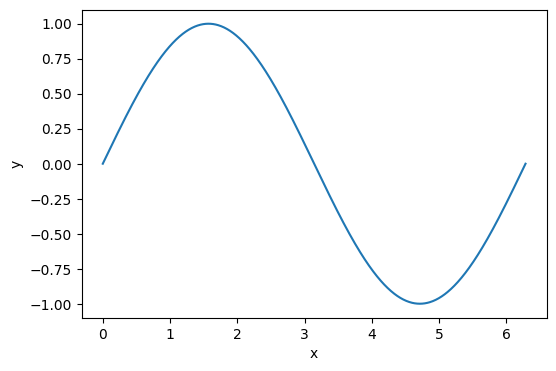

In [25]:
import numpy as np
fig, ax = plt.subplots(figsize=(6,4),facecolor='w')
x=np.linspace(0,2.0*np.pi,1000)
y=np.sin(x)
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

There are multiple other magic commands. You can get a full list by typing

In [26]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %code_wrap  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %mamba  %man  %matplotlib  %micromamba  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %uv  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%